In [1]:
%matplotlib inline

from CryMOS.IV import *
from CryMOS.IVpp import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

norm = matplotlib.colors.Normalize(vmin=0, vmax=305)
color = lambda temp: matplotlib.cm.plasma(norm(temp))

temps = [20, 40, 60, 100, 200, 300]

# IV-curves with integration over channel charge

$$ I_{ds} = \int_{V_{sb}}^{V_{db}} -\mu_{eff} Q_m d V_{ch} $$

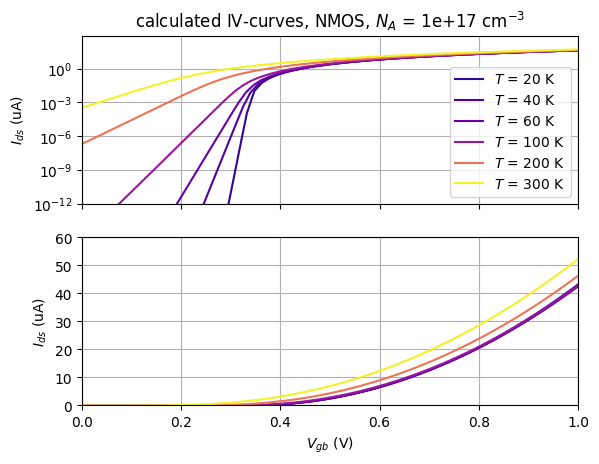

In [2]:
iv1 = BeckersIVcpp(w=1e-6,l=1e-6)

fig, [ax1,ax2] = plt.subplots(2, sharex=True)

vds = 1.0
vgt = np.linspace(-0.5, 1.0, 100)

for temp in temps:
    iv1.temp = temp
    
    vgb = iv1.v_th + vgt
    ids = iv1.i_ds(v_ds=vds, v_gb=vgb)
    ax1.plot(vgb, 1e6 * ids, c=color(temp), label=f"$T$ = {temp} K" )
    ax2.plot(vgb, 1e6 * ids, c=color(temp), label=f"$T$ = {temp} K" )
ax1.legend(), ax1.grid(), ax2.grid()
ax1.set_yscale('log')
ax1.set_xlim(0,1.0), ax1.set_ylim(1e-12, None), ax2.set_ylim(0,60)
ax2.set_xlabel("$V_{gb}$ (V)")
ax1.set_ylabel("$I_{ds}$ (uA)")
ax2.set_ylabel("$I_{ds}$ (uA)")
ax1.set_title(f"calculated IV-curves, NMOS, $N_A$ = {iv1.N_A / 1e6:.0e} cm$^{{-3}}$");

## IV-curves with linear approximation
$$ I_{ds} = -\mu_{eff} Q_{m}(V_{gb}) V_{ds} $$

C:\Users\sieberer\Projects\_PIEDMONS\CryoModels\pm-mos-model\CryMOS\Bulk.py:469: RuntimeWarning: overflow encountered in exp
  hyp2f1(1, kT / Wt, 1 + kT/Wt, -np.exp((Ecme - E_f)/kT))
C:\Users\sieberer\Projects\_PIEDMONS\CryoModels\pm-mos-model\CryMOS\Bulk.py:528: RuntimeWarning: overflow encountered in exp
  i2 = self.N_v * np.exp((Evme - E_f) / kT) * (
C:\Users\sieberer\Projects\_PIEDMONS\CryoModels\pm-mos-model\CryMOS\constants.py:150: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + g * np.exp((E1 - E2) / (k * T)))
C:\Users\sieberer\Projects\_PIEDMONS\CryoModels\pm-mos-model\CryMOS\Bulk.py:528: RuntimeWarning: overflow encountered in scalar multiply
  i2 = self.N_v * np.exp((Evme - E_f) / kT) * (
C:\Users\sieberer\Projects\_PIEDMONS\CryoModels\venv\Lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)
C:\Users\sieberer\Projects\_PIEDMONS\CryoModels\pm-mos-model\CryMOS\Bulk.py:525:

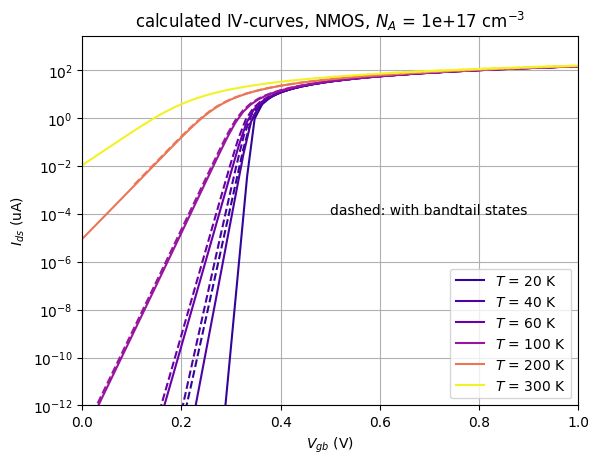

In [3]:
iv1 = BeckersIVcpp(w=1e-6,l=1e-6)
iv2 = TailsIVpy(w=1e-6,l=1e-6)

plt.figure()

vds = 1.0
vgt = np.linspace(-0.5, 1.0, 100)

for temp in temps:
    iv1.temp = temp
    iv2.temp = temp
    
    vgb = iv1.v_th + vgt
    plt.plot(vgb, 1e6 * iv1.i_ds_lin(v_ds=vds, v_gb=vgb), c=color(temp), label=f"$T$ = {temp} K" )
    
    vgb = iv2.v_th + vgt
    plt.plot(vgb, 1e6 * iv2.i_ds_lin(v_ds=vds, v_gb=vgb), '--', c=color(temp))

plt.legend(), plt.grid()
plt.yscale('log')
plt.xlim(0,1.0), plt.ylim(1e-12, None)
plt.xlabel("$V_{gb}$ (V)"), plt.ylabel("$I_{ds}$ (uA)")
plt.annotate("dashed: with bandtail states", (0.5,1e-4))
plt.title(f"calculated IV-curves, NMOS, $N_A$ = {iv1.N_A / 1e6:.0e} cm$^{{-3}}$")
plt.show()